# War Media Analysis by Anhelina Babii and Dariia Kolodiazhna - Main Part

#### In this project we collect the data, save it and perform thorough analysis on the downloaded tweets to see certain patterns and tendencies in russian rhetoric.

#### Our hypothesis is thatmost of Russian media, especially state-affiliated, are propagandistic, meaning the news articles posted constist of facts that are either exaggerated or non-existent.

#### The list of used libraries

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
import dostoevsky

In [109]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import datetime
import matplotlib.pyplot as plt
import string as st
from nltk.tokenize import word_tokenize
import simplemma
from simplemma import text_lemmatizer
import nltk
from nltk.corpus import stopwords
from string import punctuation
from pymystem3 import Mystem
import dostoevsky
import numpy as np

## Step 1: Preparing the data at last

#### Our dataset does have a column for timestamp, but the data there is too excessive and complicated - in fact, we only need the year, month and date information. 

In [4]:
df = pd.read_csv('bid_set.csv')

In [5]:
df['New Date'] = ''

In [6]:
for i in range(len(df)):
    r = df['Date'][i]
    y = r[0:4]
    m = r[5:7]
    d = r[8:10]
    newdate = y + '-' + m + '-' + d
    df['New Date'][i] = newdate

C:\Users\Dariia\AppData\Local\Temp\ipykernel_19904\1761499718.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Date'][i] = newdate


In [7]:
df

,Unnamed: 0,Date,User,Tweet,New Date
0,0,2022-09-23 16:55:00+00:00,tvrain,Включайте Дождь в 20.00. Тихон Дзядко подведет...,2022-09-23
1,1,2022-09-21 13:21:04+00:00,tvrain,Мы продолжаем знакомить вас с антивоенной поэз...,2022-09-21
2,2,2022-09-21 10:53:55+00:00,tvrain,Спецэфир на Дожде в 14:00 (мск). Будем обсужда...,2022-09-21
3,3,2022-09-20 17:12:38+00:00,tvrain,"Что Путин и Шойгу скажут в обращениях, почему ...",2022-09-20
4,4,2022-09-20 14:45:02+00:00,tvrain,Кремль готовит срочные «референдумы» на оккупи...,2022-09-20
...,...,...,...,...,...
22473,22473,2022-02-24 05:41:00+00:00,SvobodaRadio,Все новости на 7:40. Россия напала на Украину....,2022-02-24
22474,22474,2022-02-24 04:54:34+00:00,SvobodaRadio,Зеленский объявил о введении военного положени...,2022-02-24
22475,22475,2022-02-24 04:43:13+00:00,SvobodaRadio,Министр иностранных дел Украины Дмитрий Кулеба...,2022-02-24
22476,22476,2022-02-24 04:36:26+00:00,SvobodaRadio,"Даже видео Путина старое, записано ещё 21 февр...",2022-02-24


In [8]:
df['New Date'] = pd.to_datetime(df['New Date'], format='%Y-%m-%d %H:%M:%S')

In [9]:
df.dtypes

Unnamed: 0             int64
Date                  object
User                  object
Tweet                 object
New Date      datetime64[ns]
dtype: object

## Step 2: Finally work on the data

### 1. Connection between certain words used in articles and things that happened on these dates

In [10]:
data = pd.DataFrame(df, columns = ['Tweet', 'New Date'])
data['month'] = pd.DatetimeIndex(data['New Date']).month
kherson = data[data['Tweet'].str.contains('Херсон')].groupby('month').count()
shoygu = data[data['Tweet'].str.contains('Шойгу')].groupby('month').count()
voyn = data[data['Tweet'].str.contains('войн')].groupby('month').count()
otstup = data[data['Tweet'].str.contains('отступ')].groupby('month').count()
putin = data[data['Tweet'].str.contains('Путин')].groupby('month').count()

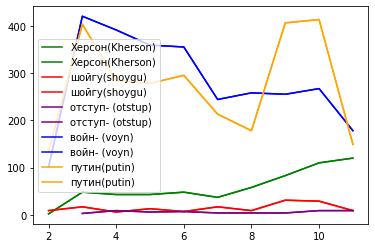

In [11]:
plt.plot(kherson, c = 'green', label = 'Херсон(Kherson)')
plt.plot(shoygu, c = 'red', label = 'шойгу(shoygu)')
plt.plot(otstup, c = 'purple', label = 'отступ- (otstup)')
plt.plot(voyn, c = 'blue', label = 'войн- (voyn)')
plt.plot(putin, c = 'orange', label = 'путин(putin)')
plt.legend()
plt.show()

## 2. Number of posts per day connected to things that happened

In [12]:
data['day'] = pd.DatetimeIndex(data['New Date']).day
freq1 = data.groupby(['month', 'day']).count()

In [13]:
max(freq1['Tweet'])

223

In [14]:
print(freq1[freq1.Tweet == freq1.Tweet.max()])

           Tweet  New Date
month day                 
2     24     223       223


In [15]:
freq1.sort_values(by = 'Tweet', ascending = False).head(3)

,,Tweet,New Date
month,day,,
2,24,223,223
3,16,201,201
9,21,195,195


Text(0, 0.5, 'Number')

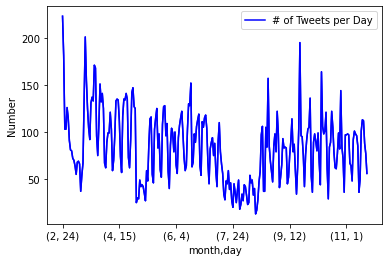

In [16]:
freq1.plot(c = 'blue')
plt.legend(['# of Tweets per Day'])
plt.ylabel('Number')

In [17]:
accs = df.groupby(['User']).count()
accs.sort_values(by='Tweet', ascending = False)

,Unnamed: 0,Date,Tweet,New Date
User,,,,
ukraina_ru,10000,10000,10000,10000
bbcrussian,4753,4753,4753,4753
SvobodaRadio,4466,4466,4466,4466
ForbesRussia,1583,1583,1583,1583
M_Simonyan,767,767,767,767
1prime_ru,512,512,512,512
navalny,309,309,309,309
tvrain,88,88,88,88


## 3. Sentiment Analysis

In [44]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()

model = FastTextSocialNetworkModel(tokenizer=tokenizer)

messages = df['Tweet']

results = model.predict(messages, k=2)



In [75]:
for i in range(1, len(df)):
    
    df['sentiment'] [i] =results[i]

C:\Users\Dariia\AppData\Local\Temp\ipykernel_19904\460864801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] [i] =results[i]


In [76]:
# check if there are any nans
df.isnull().sum()

Unnamed: 0           0
Date                 0
User                 0
Tweet                0
New Date             0
sentiment            0
Neutral sentiment    0
dtype: int64

In [77]:
df2 = df

In [78]:
df2['Neutral sentiment'] = ''

In [80]:
for i in range(len(df2)):
    df2['Neutral sentiment'][i] = str(df2['sentiment'][i])[12:18]

C:\Users\Dariia\AppData\Local\Temp\ipykernel_19904\1393453219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Neutral sentiment'][i] = str(df2['sentiment'][i])[12:18]


In [81]:
df3 = pd.DataFrame(data = df2, columns = ['User', 'Neutral sentiment'])

In [82]:
df3['Neutral sentiment'] = df3['Neutral sentiment'].astype('float')

In [83]:
gr = df3[df3.User == 'tvrain']
gr.columns = gr.columns.to_series().apply(lambda x: x.strip())
gr['Neutral sentiment']

0     0.9090
1     0.8991
2     0.8031
3     0.8706
4     0.9381
       ...  
83    0.7606
84    0.4765
85    0.8267
86    0.9344
87    0.9481
Name: Neutral sentiment, Length: 88, dtype: float64

In [84]:
avg1 = gr['Neutral sentiment'].sum()/len(gr)

In [85]:
avg1

0.7795647727272726

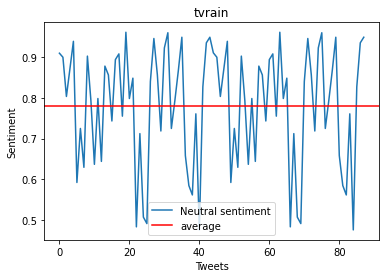

In [86]:
gr.plot()
plt.axhline(y = avg1, c = 'red', label = 'average')
plt.title("tvrain")
plt.xlabel('Tweets') 
plt.ylabel('Sentiment') 
plt.legend()

In [87]:
df3['User'].unique()

array(['tvrain', 'navalny', 'bbcrussian', 'ukraina_ru', '1prime_ru',
       'M_Simonyan', 'ForbesRussia', 'SvobodaRadio'], dtype=object)

In [88]:
gr1 = df3[df3.User == 'M_Simonyan']
gr1.columns = gr.columns.to_series().apply(lambda x: x.strip())
gr1=gr1.reset_index()
gr1['Neutral sentiment']


0      0.3550
1      0.3345
2      0.3702
3      0.6370
4      0.7431
        ...  
762    0.1871
763    0.5926
764    0.3345
765    0.8519
766    0.5000
Name: Neutral sentiment, Length: 767, dtype: float64

In [89]:
gr1 = gr1.drop(gr1[gr1['Neutral sentiment'] > 1].index)

In [90]:
avg_ukr = gr1['Neutral sentiment'].sum()/len(gr1)

In [91]:
avg_ukr

0.6141872751322751

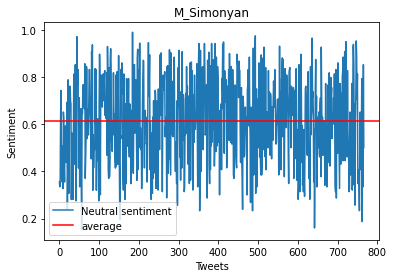

In [92]:
gr1.plot(y = 'Neutral sentiment')
plt.axhline(y = avg_ukr, c = 'red', label = 'average')
plt.title("M_Simonyan")
plt.xlabel('Tweets') 
plt.ylabel('Sentiment') 
plt.legend()
plt.legend()

## 4. TDF-IF Analysis

In [93]:
cleaned = df

In [96]:
#Create lemmatizer and stopwords list

mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [121]:
cleaned['Tweet']=cleaned['Tweet'].apply(lambda x: preprocess_text(x) )

In [122]:
cleaned.to_csv('lemmatized_data.csv', encoding='utf-8')

In [104]:
cleaned = pd.read_csv('lemmatized_data.csv', encoding='utf-8')

In [105]:
gr  = cleaned
gr['New Date'] = df['New Date']

gr = pd.DataFrame(gr, columns = ['Tweet', 'New Date'])
gr['month'] = pd.DatetimeIndex(gr['New Date']).month


In [106]:
gr['alltw'] = gr.groupby(['month'])['Tweet'].transform(lambda x : ' '.join(x))
gr=gr.groupby('month').first().reset_index()

In [107]:
gr.drop(['Tweet'], axis=1)

,month,New Date,alltw
0,2,2022-02-28,путин подписывать указ специальный экономическ...
1,3,2022-03-02,украинский футболист ярослав ракицкий расторга...
2,4,2022-04-29,дирижер путинский война https // t co fobbzc5...
3,5,2022-05-31,растерзанный мариуполь избегать призыв поддерж...
4,6,2022-06-30,❗ ️ новость погибать генерал кутузов леопард ...
5,7,2022-07-19,начинаться новость наш телегр канал снова чита...
6,8,2022-08-31,вера павлова 27 апрель читать ингеборга дапкун...
7,9,2022-09-23,включать дождь 20.00 тихон дзядко подводить ит...
8,10,2022-10-20,22 28 никто требовать казнить любитель путин с...
9,11,2022-11-17,2 10 1 уголовный дело возбуждать б путин врать...


In [110]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=0, stop_words= None)
# right
tfidf = tfidf_vectorizer.fit_transform(gr['alltw'])
tfidf_df = pd.DataFrame(tfidf.toarray(), index=gr["month"], columns=tfidf_vectorizer.get_feature_names())
tfidf_df=tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_1': 'term'})

C:\Users\Dariia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [115]:
tfidf_df15=tfidf_df.sort_values(by=['month','tfidf'], ascending=[True,False]).groupby(['month']).head(15)